# Assignment 9: Clustering Customers of a Comic Book Store

In this assignment, you will be solving a traditional problem in quantitative marketing: Customer segmentation. Having a properly segmented database is extremely important to define marketing campaigns, as it allows companies to define value-centric actions targeted towards customers of different profiles. While there are several ways we can cluster customers, in this example we will use the [Recency, Frequency and Monetary Value](https://en.wikipedia.org/wiki/RFM_(market_research)), or RFM, paradigm to do so. This way of thinking of customer data reflects the engagement between a customer and a company by reducing their interactions to three values:

- The **Recency** between interactions: The time between two subsequent purchases or between two general interactions between the customer and your organization.

- The **Frequency** of interactions: The raw number of interactions over a predefined time. This can be for example how many times a customer visits your website every month, or how many purchases the customer does at your store, etc.

- The **Monetary Value** of the interactions: The total monetary value (not necessarily positive) of the interactions of the customer with your organization over the same period of time as before.

Additionally, this dataset has a **Cost of Service** variable (which is not included in the MV calculations for this example). It shows how much cost each interaction with the customer brings. This can be useful information as a customer may make purchases of small monetary value, but may spend many hours at the store occupying the service personnel's time. This can mean on average these customers may even end up being a cost to the company! The information comes from a local comic book store, and represents the summary of interactions of the customers with a loyalty card.

In this assignment, we will create a clustering of the customers using these four variables and will create a commercial strategy arising from our results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
# Importing additional libraries:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [3]:
# Uncomment if working in the cloud
#!gdown https://drive.google.com/uc?id=1VL-LjrjgCtGWkDw914MVLj2sEttlL2Uv

## Task 1: Studying the data [10 pts]

Import the data and present the descriptive statistics of all variables. **Written answer: What can you say about the variables you have? Why should you normalize the data?**. Normalize the data so you can create clusters.

In [4]:
# Read the data

df = pd.read_csv('RFM_Assignment_09.csv')
df.head()

,Recency,Frequency,MV,CoS
0,0.756050,101.017816,1240.328031,1049.275429
1,-1.441917,99.257682,1048.723617,1046.474190
2,-1.850722,98.941549,1080.081477,973.500361
3,5.040092,98.533635,1128.207864,1003.273138
4,5.503914,99.427978,1073.346452,961.793413


In [5]:
df.describe()

,Recency,Frequency,MV,CoS
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,30.116293,17.164128,8806.972152,8805.228492
std,17.742131,29.419952,3391.111080,3285.384316
min,-4.942628,-1.237633,760.115629,944.136187
25%,18.221827,3.710640,8065.394231,9957.361435
50%,28.588186,6.030687,10462.416975,10000.463454
75%,35.880252,9.999136,10608.634596,10041.297949
max,67.258701,102.189321,11139.504803,11054.536104


In [6]:
df.shape

(1000, 4)

In [7]:
df.isnull().sum()

Recency      0
Frequency    0
MV           0
CoS          0
dtype: int64

- **We have no null values. We have a total of 1000 rows and 4 columns.**

In [8]:
# Normalize (Standard) and apply to the data

# Splitting the data into X and y:
X = df.drop(['CoS'], axis = 'columns')
y = df.CoS

# Normalizing the data:
ss = StandardScaler()
ss.fit(X,y)

# Checking the normalized data:
print('Normalized X is-')
print(X.head())
print('\n Normalized y is-')
print(y.head())

Normalized X is-
    Recency   Frequency           MV
0  0.756050  101.017816  1240.328031
1 -1.441917   99.257682  1048.723617
2 -1.850722   98.941549  1080.081477
3  5.040092   98.533635  1128.207864
4  5.503914   99.427978  1073.346452

 Normalized y is-
0    1049.275429
1    1046.474190
2     973.500361
3    1003.273138
4     961.793413
Name: CoS, dtype: float64


**Written answer:**

- It is important to normalize the data because we need to bring the values of our variables to a common scale. Normalizing the data helps us make the data more normally distributed. When the data will be normally distibuted (that is when the data will be on a common scale), our code will be easier to run.

## Task 2: K-Means Clustering and Silhoutte Analysis [30 pts]

Now we can perform the cluster analysis. The single most important question in cluster analysis is to determine the number of clusters that you should create. Following the labs (or [this tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)), try between 3 and 8 clusters, using a seed of 10, and plot their silouhette analyses (we will plot the clusters themselves in the next question). **Written answer: What is the optimal number of clusters using the silhouette method?**

For cluster number: 3 , the average Silhouette Score is : 0.9221428762038931
For cluster number: 4 , the average Silhouette Score is : 0.8536081996783402
For cluster number: 5 , the average Silhouette Score is : 0.8002017270395368
For cluster number: 6 , the average Silhouette Score is : 0.7168366540651124
For cluster number: 7 , the average Silhouette Score is : 0.6872072598240911
For cluster number: 8 , the average Silhouette Score is : 0.6381952663804539


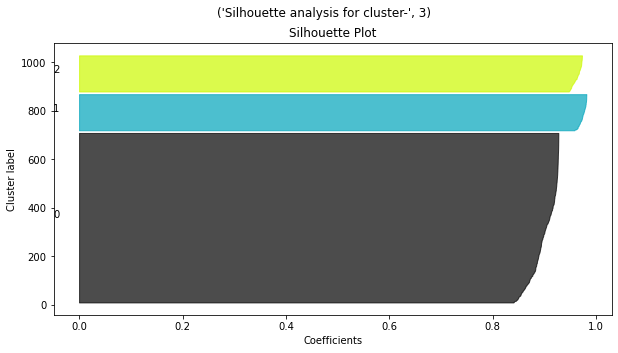

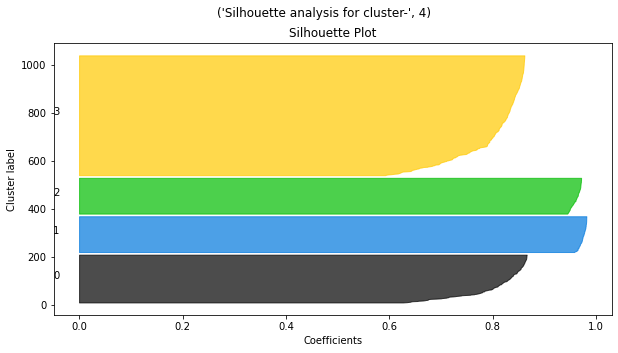

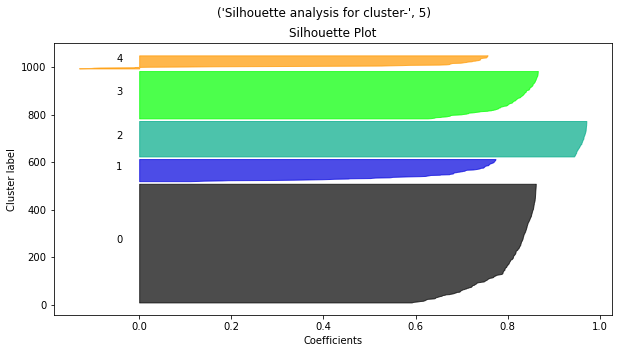

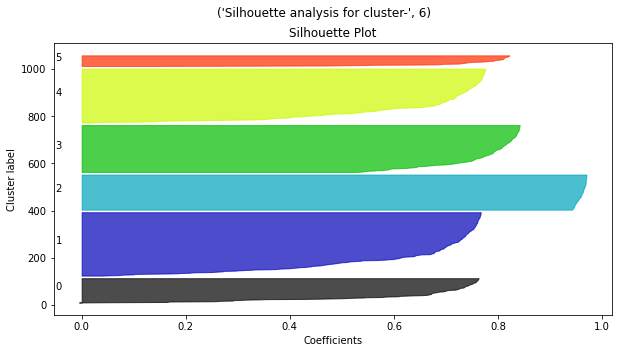

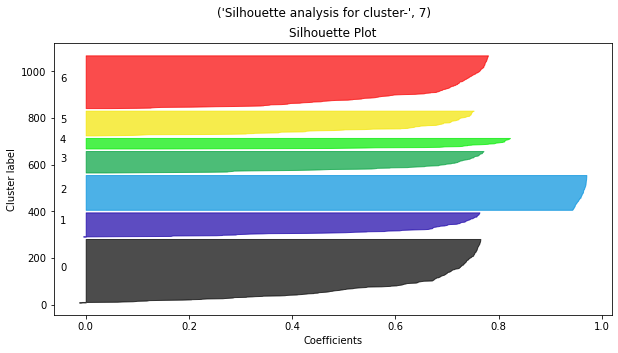

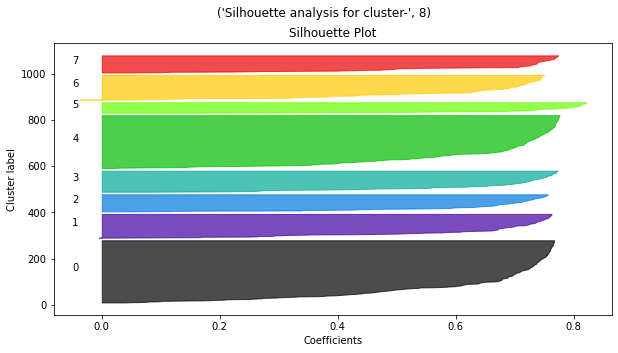

In [9]:
# Your answer here.

for i in (3,4,5,6,7,8):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(10, 5)
    a = KMeans(n_clusters = i, random_state = 10)
    labels = a.fit_predict(X)
    avg = silhouette_score(X,labels)
    print("For cluster number:", i,", the average Silhouette Score is :", avg)

    samples = silhouette_samples(X,labels)

    y_lower = 10
    for j in range(i):
        values = \
        samples[labels == j]
        values.sort()

        y_upper = y_lower + values.shape[0]

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, values, facecolor=color,edgecolor=color, alpha = 0.7)

        ax1.text(-0.05, y_lower + 0.5 * values.shape[0], str(j))

        y_lower = y_upper + 10  

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Coefficients")
    ax1.set_ylabel("Cluster label") 
    plt.suptitle(("Silhouette analysis for cluster-",i))

**Written answer:**

- We can see that for cluster number 7 and 8, the average Silhouette Score is lower than that for 3, 4, 5 and 6. Usually a value closer to 1 is more preferable so we reject cluster number 7 and 8 (there scores are 0.687 and 0.638 respectively). In cluster number 3, 4 and 5 the silhouette plot is not uniform. This can be seen clearly as in number 3 the blue plot is much more thick than the other colors. Similarly, this is visible in number 4 (red color), number 5 (blue color). Therefore, ideally we are left with only cluster number 6. It is the optimal number for clusters.

## Task 3: Plotting the clusters [20 pts]

Now we will visualize what we just did. For this we will use a common trick in clustering: use a PCA transform to reduce the data to a few variables (two or three) and plot those. Apply a PCA transform to the data using two components and create a scatterplot, differentiating by using colours the clusters from previous answer using a different colour. **Note the clusters still must be calculated over the unrotated data**. Use only your results from using 3, 4 and 5 clusters. **Written answer: How many clusters would you use considering the results of task 2 and these ones?**

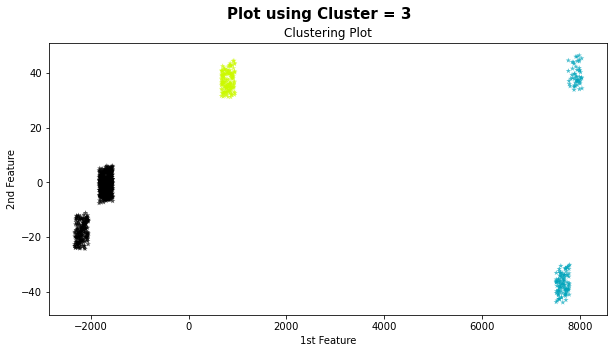

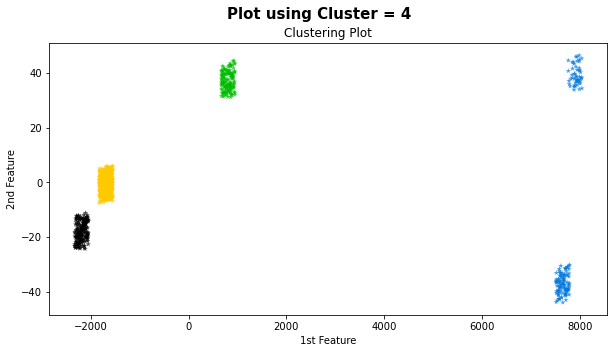

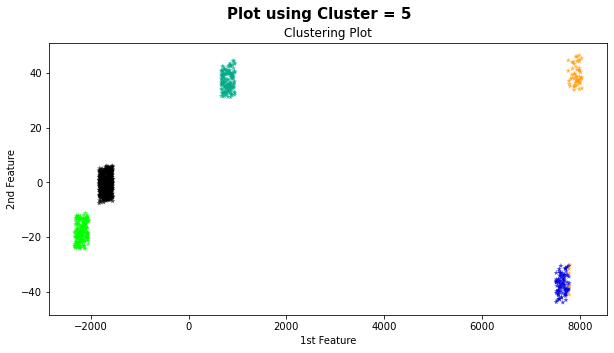

In [10]:
# Your code here. Add as many cells as you need!

given_range = [3, 4, 5]

pca_transform = PCA(n_components= 2)
pca_transform.fit(X)
X_scaled = pca_transform.transform(X)

for i in given_range:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(10, 5)

    clusterer = KMeans(n_clusters = i, random_state = 10)
    labels = clusterer.fit_predict(X)

    colors = cm.nipy_spectral(labels.astype(float) / i)
    ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='*', s=30, lw=0, alpha=0.7, c=colors)
    ax1.set_title("Clustering Plot")
    ax1.set_xlabel("1st Feature")
    ax1.set_ylabel("2nd Feature")
    plt.suptitle(("Plot using Cluster = %d" % i),fontsize=15, fontweight='bold')
plt.show()

**Written answer**

-  Plot using cluster = 5 seems a better option.

## Task 4: Deploying the model. [20 pts]

The objective of any cluster analysis over customer data is to create a reasonable segmentation of your customers. Using the number of clusters you have decided in Task 3 and a table of the averages per variable for each cluster, name the different clusters and think what would a company would do with a customer in that cluster. (*Hint: For example a clusters with high frequency, low recency, and low monetary value are desirable customers for whom it would be a good plan to try to increase their monetary value while keeping their high engagement. You could name them "Diamonds in the rough". [Pandas' `groupby`](https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average) can probably help.*)

In [11]:
# Your code here.

pipe1 = Pipeline([('kmeancl',KMeans(n_clusters=5))])
pipe1.fit(X)

df['Predicted Clusters'] = pipe1.predict(X)
df.groupby(['Predicted Clusters']).mean()

,Recency,Frequency,MV,CoS
Predicted Clusters,,,,
0,4.373953,98.013580,1148.408062,1009.104620
1,30.017272,5.059000,10494.803018,10000.188643
2,59.809092,0.868768,8007.350500,11001.099604
3,14.911803,10.008273,10996.540746,9999.457148
4,58.674804,50.200999,863.597411,1089.802615


**Written answer: (note this answer will be much longer than usual as you need to make an argument for every cluster)**

Assumption: Diamond > Platinum > Gold > Silver > Bronze

**For cluster 0**, the customers are not that frequent but they provide a really high monetary value (but they also have high cost of service). I would suggest that because these customers visit less frequently and still provide a high monetary value so the organization should stay the same with them. The organization can provide them offers sometimes so they may visit more. I would name this group as **'`Platinum`'**.

**For cluster-1**, the customers are the most frequent ones but also have a low monetary value with fine cost of service. Because these customers are the most frequent ones, the ogranization should aim to get more monetary value from them by giving them unique discounts and offers as part of brand loyalty. I would name them as **'`Gold`'**.

**For cluster-2**, they are the least frquent group with a high monetary value but even higher cost of service. The organization can focus less on them as they visit the least and are responsible for a higher cost of service. Only advantage of them is they provide good monetary value. The company should however concentrate less on these customers as they are more of a liability (CoS > MV). I would name them as '**`Silver`**'.

**For Cluster-3**, they provide the highest monetary value and are finely frequent. The organization should definetely aim to make them more frequent by may be organizing some comic book events (or fairs) and invite them and provide them good offers. I would name them under '**`Diamond`**' category.

**Last cluster-4** is highly frequent customer group with the least monetary value and higher cost of service. The organization can focus less on them. I would name them under '**`Bronze`**' category.